In [58]:
###############################################################################
#Import package
###############################################################################

#Import linear algebra and data manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

#Import common utilities
import math
import warnings
warnings.filterwarnings('ignore')

# statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer

# Accuracy Evaluation
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
import sklearn.metrics as metrics
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

# NLP
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Load Data

In [5]:
###############################################################################
#Load data
###############################################################################
# listings
listings_df = pd.read_csv('C:\\DataScience\\00_AnalysisProjects\\AirbnbAnalysis\\Data\\seattle_listings.csv', sep=',')
listings_df.shape   # (3818, 92)
# calendar
calendar_df = pd.read_csv('C:\\DataScience\\00_AnalysisProjects\\AirbnbAnalysis\\Data\\seattle_calendar.csv')
calendar_df.shape   # (1393570, 4)
# reviews
review_df = pd.read_csv('C:\\DataScience\\00_AnalysisProjects\\AirbnbAnalysis\\Data\\seattle_reviews.csv')
review_df.shape   # (84849, 6)

(84849, 6)

# Configuration

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 505)

# View data structure and content

### Data type of all colums

In [9]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

### Summary stats on each of the numeric columns

In [10]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


### Columns

In [6]:
# All column names
listings_df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

In [12]:
# Print all column names
for col in listings_df.columns.values:
    print(col)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_re

# Data Frame

### Drop columns

In [39]:
tmp_df = listings_df
col_list = tmp_df.columns.values
print('Num of columns of original dataframe: ' + str(col_list.size))

remove_list = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',       
              'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
              'picture_url', 'xl_picture_url', 'host_id', 'host_url',
              'host_thumbnail_url', 'host_picture_url',       
              'host_has_profile_pic',
              'calendar_last_scraped', 
              'first_review', 'last_review',
              'requires_license', 'license', 'jurisdiction_names',
              'is_business_travel_ready',
              'require_guest_profile_picture',
              'require_guest_phone_verification']

col_list = [e for e in col_list if e not in remove_list]
tmp_df = tmp_df.loc[:,col_list]
print('Num of columns of remaining dataframe: ' + str(tmp_df.shape[1]))

Num of columns of original dataframe: 93
Num of columns of remaining dataframe: 71


### Handling missing values

# Common Functions

### Check missing data

In [44]:
# Type 1
def Check_Missing_Data1(df):    
    # count all missing values of each column
    total = df.isnull().sum().sort_values(ascending=False)
    # calculate percentage of null values for each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

Check_Missing_Data1(listings_df)

,Total,Percent
license,3818,1.000000
square_feet,3721,0.974594
monthly_price,2301,0.602672
security_deposit,1952,0.511262
weekly_price,1809,0.473808
notes,1606,0.420639
neighborhood_overview,1032,0.270299
cleaning_fee,1030,0.269775
transit,934,0.244631
host_about,859,0.224987


In [52]:
# Type 2
def Check_Missing_Data2(df):   
    col_analysis = []
    for column in df.columns:
        numNulls = len(df[column][df[column].isnull()])
        totalLength = len(df[column])
        dict1 = {'Name':column,'DataType':df[column].dtype, 'NumberOfNulls':numNulls, 'PercentageNulls':numNulls*100.0/totalLength}
        col_analysis.append(dict1)
    col_anal_df = pd.DataFrame(col_analysis)[['Name', 'DataType','NumberOfNulls','PercentageNulls']].sort_values(by='PercentageNulls', ascending=False)
    return col_anal_df

col_anal_df = Check_Missing_Data2(listings_df)
col_anal_df

,Name,DataType,NumberOfNulls,PercentageNulls
84,license,float64,3818,100.000000
56,square_feet,float64,3721,97.459403
59,monthly_price,object,2301,60.267156
60,security_deposit,object,1952,51.126244
58,weekly_price,object,1809,47.380828
10,notes,object,1606,42.063908
9,neighborhood_overview,object,1032,27.029859
61,cleaning_fee,float64,1030,26.977475
11,transit,object,934,24.463070
21,host_about,object,859,22.498690


In [53]:
# remove the data inputs with percentage of missing values larger than 30%
useful_cols = col_anal_df[col_anal_df.PercentageNulls < 30]
print('List of Predictors and their respective percentages of missing values')
display(useful_cols)

List of Predictors and their respective percentages of missing values


,Name,DataType,NumberOfNulls,PercentageNulls
9,neighborhood_overview,object,1032,27.029859
61,cleaning_fee,float64,1030,26.977475
11,transit,object,934,24.463070
21,host_about,object,859,22.498690
24,host_acceptance_rate,object,773,20.246202
79,review_scores_checkin,float64,658,17.234154
77,review_scores_accuracy,float64,658,17.234154
82,review_scores_value,float64,656,17.181771
81,review_scores_location,float64,655,17.155579
78,review_scores_cleanliness,float64,653,17.103195


In [55]:
useful_cols.Name.values
tmp_df = listings_df.loc[:,useful_cols.Name.values]
tmp_df.shape

(3818, 87)

In [109]:
def Normalize_Data(X_data):    
    for col in X_data.columns.values:
        X_data[col] = X_data[col].astype(float)
        mean = np.mean(X_data[col])
        std = np.std(X_data[col])
        X_data[col] = X_data[col].apply(lambda x: (x - mean) / std)
    return X_data

review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                    'review_scores_value']
tmp_df = listings_df[review_scores_columns]

for column in review_scores_columns:
    tmp_df[column].fillna(tmp_df[column].mean(), inplace = True)# fill NaN values with 0

X_data = Normalize_Data(tmp_df)
X_data.head()


,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,7.654173e-02,5.726658e-01,6.112031e-01,3.937630e-01,3.679779e-01,-1.063670e+00,8.023812e-01
1,2.426703e-01,5.726658e-01,6.112031e-01,3.937630e-01,3.679779e-01,6.831564e-01,8.023812e-01
2,4.087988e-01,5.726658e-01,6.112031e-01,3.937630e-01,3.679779e-01,6.831564e-01,8.023812e-01
3,-1.487322e-13,1.119073e-14,6.363495e-14,-1.049403e-13,-1.304567e-13,5.275077e-14,1.769432e-13
4,-4.218439e-01,-1.002290e+00,-7.666159e-01,3.937630e-01,3.679779e-01,-1.063670e+00,-6.624741e-01


# Numerical features

### Select all numerical features in the dataset

In [60]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
numericdata = listings_df.select_dtypes(include=numerics)
numericdata.shape      

(3818, 34)

### Impute missing values 

In [69]:
# Impute Missing values: Use Mean for Real values Columns
imp = Imputer(missing_values='NaN', strategy='mean', axis=0) 
# numericdata[numericdata.columns.values] = imp.fit_transform(numericdata[numericdata.columns.values])
# Check_Missing_Data(numericdata)


In [112]:
#fill missing values for review scores columns
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                    'review_scores_value']
tmp_df = listings_df[review_scores_columns]
for column in review_scores_columns:
    tmp_df[column].fillna(tmp_df[column].mean(), inplace = True)

Check_Missing_Data2(tmp_df)

,Name,DataType,NumberOfNulls,PercentageNulls
0,review_scores_rating,float64,0,0.0
1,review_scores_accuracy,float64,0,0.0
2,review_scores_cleanliness,float64,0,0.0
3,review_scores_checkin,float64,0,0.0
4,review_scores_communication,float64,0,0.0
5,review_scores_location,float64,0,0.0
6,review_scores_value,float64,0,0.0


### Correlation plot

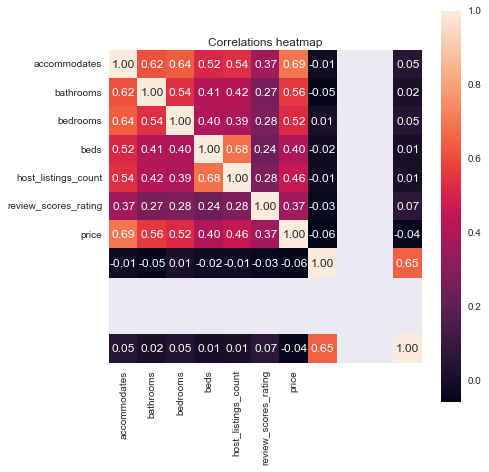

In [199]:
#Numerical columns to find out correlation
columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                    'review_scores_value','accommodates','bathrooms','bedrooms','price']
tmp_df = listings_df[columns]
for column in review_scores_columns:
    tmp_df[column].fillna(tmp_df[column].mean(), inplace = True)

#Find out correlation between columns and plot
corrs = np.corrcoef(tmp_df.values.T)
corrs

sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols).set_title('Correlations heatmap')
fig = hm.get_figure()

### bathrooms

In [208]:
listings_df['bathrooms'] = listings_df['bathrooms'].fillna(listings_df['bathrooms'].mode()[0])

### bedrooms

In [209]:
listings_df['bedrooms'] = listings_df['bedrooms'].fillna(listings_df['bedrooms'].mode()[0])

### beds

In [211]:
listings_df['beds'] =listings_df['beds'].fillna(listings_df['beds'].mode()[0])

### cleaning_fee

In [30]:
# View data
listings_df['cleaning_fee'].head()

0        NaN
1     $40.00
2    $300.00
3        NaN
4    $125.00
Name: cleaning_fee, dtype: object

In [32]:
# convert from string to float
listings_df['cleaning_fee'] = (listings_df['cleaning_fee'].str.replace(r'[^-+\d.]', '').astype(float))
listings_df['cleaning_fee'] = df['cleaning_fee'].str.replace("[$, ]", "").astype("float")
listings_df['cleaning_fee'].head()

0      NaN
1     40.0
2    300.0
3      NaN
4    125.0
Name: cleaning_fee, dtype: float64

### extra_people

In [33]:
# View data
listings_df['extra_people'].head()

0     $5.00
1     $0.00
2    $25.00
3     $0.00
4    $15.00
Name: extra_people, dtype: object

In [34]:
# convert from string to float
listings_df['extra_people'] = (listings_df['extra_people'].str.replace(r'[^-+\d.]', '').astype(float))
listings_df['extra_people'] = df['extra_people'].str.replace("[$, ]", "").astype("float")
listings_df['extra_people'].head()

0     5.0
1     0.0
2    25.0
3     0.0
4    15.0
Name: extra_people, dtype: float64

### host_listings_count

In [207]:
#fill missing values with mean value for host_listings_count
listings_df['host_listings_count'].fillna(listings_df['host_listings_count'].mean(), inplace = True)


### host_response_rate

In [206]:
#convert host_response_rate into number and fill in missing values, drop the original column
listings_df['host_response_rate_num'] = listings_df['host_response_rate'].astype(str)
listings_df['host_response_rate_num'] = listings_df['host_response_rate_num'].str.replace("%", "").astype("float")
listings_df['host_response_rate_num'].fillna(listings_df['host_response_rate_num'].mean(), inplace = True)


### price

In [13]:
# View data
listings_df['price'].head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

In [48]:
# data type
listings_df['price'].dtype

dtype('float64')

In [20]:
# Convert price from string to float
listings_df['price'] = (listings_df['price'].str.replace(r'[^-+\d.]', '').astype(float))
listings_df['price'] = df['price'].str.replace("[$, ]", "").astype("float")
listings_df['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [21]:
# Check num or rows having price = 0 and <> 0
print(listings_df[listings_df.price  == 0].shape)
print(listings_df[listings_df.price  > 0].shape)

(0, 92)
(3818, 92)


In [23]:
# remove rows with price = 0
listings_df = listings_df.loc[listings_df.price > 0,:] 
listings_df[listings_df.price  == 0].shape

(0, 92)

In [29]:
# transfrom price to log price
listings_df['log_price']  = listings_df['price'].apply(lambda x: math.log(x))
listings_df['log_price'].head()

0    4.442651
1    5.010635
2    6.882437
3    4.605170
4    6.109248
Name: log_price, dtype: float64

In [110]:
#find minimum, maximum and average price for listing
min_price = listings_df['price'].min()
max_price = listings_df['price'].max()
mean_price = listings_df['price'].mean()

print('Minimum price per listing is %d$.' % (min_price))
print('Maximum price per listing is %d$' % (max_price))
print('Average price per listing is %d$.' % (mean_price))


Minimum price per listing is 20$.
Maximum price per listing is 1000$
Average price per listing is 127$.


# Categorical features

### Select all categorical features in the dataset

In [72]:
categorical = ['object']
categoricaldata = listings_df.select_dtypes(include=categorical)
categoricaldata.shape     

(3818, 59)

### List unique values and num of rows

In [84]:
categoricaldata['bed_type'].value_counts()

Real Bed         3083
Futon              66
Pull-out Sofa      42
Airbed             23
Couch              11
Name: bed_type, dtype: int64

### Check missing data

In [86]:
Check_Missing_Data1(categoricaldata)

,Total,Percent
monthly_price,1928,0.597829
security_deposit,1613,0.500155
weekly_price,1500,0.465116
notes,1245,0.386047
neighborhood_overview,764,0.236899
host_about,726,0.225116
transit,682,0.211473
host_acceptance_rate,650,0.201550
last_review,511,0.158450
first_review,511,0.158450


### Handling missing data

In [79]:
# remove NaN values
categoricaldata[categoricaldata['summary'].isnull()].head()[['name','summary']]



,name,summary
0,Stylish Queen Anne Apartment,NaN
34,The Hideaway- Queen Anne/downtown,NaN
49,Seattle Backyard Cottage-Queen Anne,NaN
89,Pretty Condo in Downtown Ballard,NaN
91,Chic 3 bed 4 bath Ballard townhome,NaN


In [80]:
categoricaldata = categoricaldata[~categoricaldata['summary'].isnull()]
categoricaldata[categoricaldata['summary'].isnull()].head()[['name','summary']]

,name,summary


In [91]:
# Use Highest frequency for categorical columns
categoricaldata[categoricaldata['property_type'].isnull()].head()[['name','property_type']]

,name,property_type
2184,Sweet Seattle Urban Homestead 2 Bdr,NaN


In [93]:
categoricaldata['property_type'] = categoricaldata['property_type'].fillna(categoricaldata['property_type'].mode()[0])
categoricaldata[categoricaldata['property_type'].isnull()].head()[['name','property_type']]

,name,property_type


In [101]:
# remove NaN values
categoricaldata[categoricaldata['host_location'].isnull()].head()[['name','host_location']]
categoricaldata[categoricaldata['host_neighbourhood'].isnull()].head()[['name','host_neighbourhood']]

,name,host_neighbourhood
1297,The View | Be Inspired in Seattle,NaN
1419,Luxury Apartment in Belltown / SLU,NaN


In [103]:
#Use Highest frequency for categorical columns
categorical_value_cols = ['host_neighbourhood','host_location']
categoricaldata[categorical_value_cols] = categoricaldata[categorical_value_cols].apply(lambda x:x.fillna(x.mode()[0]))


In [105]:
categoricaldata[categoricaldata['host_location'].isnull()].head()[['name','host_location']]
categoricaldata[categoricaldata['host_neighbourhood'].isnull()].head()[['name','host_neighbourhood']]

,name,host_neighbourhood


### amenities

In [221]:
col = listings_df.amenities
t = col[0]
t.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')


['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer']

In [223]:
values_dict = {}
for unique_value in col.unique(): 
    for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
        if value in values_dict:
            values_dict[value] = values_dict[value] + 1
        else:
            values_dict[value] = 0            
values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
values_sorted

[('Wireless Internet', 3177),
 ('Heating', 3139),
 ('Kitchen', 2947),
 ('Smoke Detector', 2849),
 ('Essentials', 2789),
 ('Dryer', 2554),
 ('Washer', 2549),
 ('Internet', 2375),
 ('Shampoo', 2302),
 ('TV', 2212),
 ('Carbon Monoxide Detector', 2114),
 ('Free Parking on Premises', 1866),
 ('Fire Extinguisher', 1862),
 ('Family/Kid Friendly', 1668),
 ('First Aid Kit', 1467),
 ('Cable TV', 1234),
 ('Pets live on this property', 862),
 ('Indoor Fireplace', 788),
 ('Hangers', 736),
 ('Elevator in Building', 685),
 ('Hair Dryer', 665),
 ('Laptop Friendly Workspace', 659),
 ('Iron', 635),
 ('Safety Card', 627),
 ('Air Conditioning', 584),
 ('24-Hour Check-in', 521),
 ('Dog(s)', 500),
 ('Buzzer/Wireless Intercom', 467),
 ('Pets Allowed', 450),
 ('Cat(s)', 371),
 ('Gym', 369),
 ('Wheelchair Accessible', 270),
 ('Breakfast', 267),
 ('Hot Tub', 263),
 ('Suitable for Events', 184),
 ('Pool', 123),
 ('Lock on Bedroom Door', 94),
 ('Smoking Allowed', 78),
 ('Doorman', 70),
 ('Other pet(s)', 49),
 ('W

In [227]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

tmp_df =  listings_df[['id','amenities']]
# split into columns
for value in values_sorted[: 15]:
    tmp_df['amenities_' + value[0]] = tmp_df.apply(lambda row: get_val_from_list(row, 'amenities', value[0]),axis=1)
tmp_df.head()

,id,amenities,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV,amenities_Carbon Monoxide Detector,amenities_Free Parking on Premises,amenities_Fire Extinguisher,amenities_Family/Kid Friendly,amenities_First Aid Kit
0,241032,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,953595,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3308979,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,7421966,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,278830,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [216]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

def split_list_into_columns(df, column_name, max_dummies_num = 10):
    ''' Split values in columns, which contain lists (for example, amenities) '''
    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
      
    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        
    return

In [219]:
tmp_df =  listings_df[['id','amenities']]
#split amenities into dummy columns and drop the original column
split_list_into_columns(tmp_df, 'amenities')

tmp_df.head()
tmp_df.columns.values

array(['id', 'amenities', 'amenities_Wireless Internet',
       'amenities_Heating', 'amenities_Kitchen',
       'amenities_Smoke Detector', 'amenities_Essentials',
       'amenities_Dryer', 'amenities_Washer', 'amenities_Internet',
       'amenities_Shampoo', 'amenities_TV'], dtype=object)

### neighbourhood_group_cleansed

In [169]:
#get list of neighbourhoods
neighbourhoods = listings_df['neighbourhood_group_cleansed'].unique()
neighbourhoods

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill', 'Lake City'], dtype=object)

In [156]:
#merge datasets
df = listings_df
df = df.rename(index=str, columns={"id": "listing_id"})
df = pd.merge(calendar_df, df, on = 'listing_id')
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda x:x.to_pydatetime())
df['year'] = df['date'].apply(lambda x:x.year)
df['year'] = df['year'].astype(int)
df['month'] = df['date'].apply(lambda x:x.month)
df['month'] = df['month'].astype(int)
df = df.drop(columns = ['date'])
#remove rows where price_x == nan, because price will be used as response column
df = df.dropna(subset=['price_x'])
#convert price to number and drop the price_x column
df['price'] = df['price_x'].astype(str)
df['price'] = df['price'].str.replace("[$, ]", "").astype("float")
df = df.drop(columns = ['price_x'])


In [177]:
#get prices by month and neighbourhood
price_by_month_neighbourhood = df.groupby(['month','neighbourhood_group_cleansed']).mean().reset_index()
price_by_month_neighbourhood

,month,neighbourhood_group_cleansed,listing_id,year,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price_y,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,log_price,price
0,1,Ballard,5.090027e+06,2016.096792,2.016010e+13,1.550389e+07,6.017945,6.017945,47.674529,-122.380826,3.328439,1.221316,1.329255,1.806417,351.954545,117.471180,62.894542,1.749048,9.142469,2.035345,745.519032,24.065253,49.142741,74.768896,285.789831,35.489125,95.737039,9.749219,9.713929,9.906309,9.919113,9.762961,9.549656,NaN,1.773518,2.847920,4.609079,108.986406
1,1,Beacon Hill,4.799768e+06,2016.081517,2.016010e+13,1.477176e+07,3.385782,3.385782,47.567788,-122.304845,3.018957,1.220440,1.242180,1.682464,222.608696,97.924645,49.871910,1.428910,11.010900,1.993365,684.513744,25.363033,52.154976,79.330332,300.581043,29.578199,93.559128,9.540054,9.423978,9.787466,9.798910,9.013624,9.274114,NaN,3.284834,2.326649,4.416596,97.777725
2,1,Capitol Hill,5.619135e+06,2016.092715,2.016010e+13,1.683562e+07,5.743551,5.743551,47.623607,-122.315958,2.898435,1.257199,1.117449,1.492822,809.785933,127.916244,54.727790,1.511279,9.793416,5.202806,762.338154,24.633243,50.965030,77.245764,290.574744,24.614031,93.786406,9.524747,9.388527,9.743081,9.778973,9.826417,9.292498,NaN,4.076632,2.118978,4.690074,123.823421
3,1,Cascade,5.692750e+06,2016.106383,2.016010e+13,1.875723e+07,2.671031,2.671031,47.634683,-122.331466,2.973813,1.195581,1.146481,1.572013,783.593750,144.294599,49.056645,1.583470,10.523732,1.891162,825.382979,23.882979,49.600655,76.170213,272.726678,20.993453,91.748597,9.312009,9.362514,9.836139,9.858586,9.589226,9.046016,NaN,1.399345,2.055376,4.770662,139.289689
4,1,Central Area,5.612709e+06,2016.095384,2.016010e+13,1.610480e+07,2.152580,2.152580,47.608136,-122.301944,3.466565,1.357264,1.365071,1.772573,1282.108696,124.163612,61.648867,1.804820,11.937033,2.024270,683.269857,24.871181,51.709606,78.275967,299.867278,24.906483,95.929532,9.749649,9.698856,9.823931,9.838185,9.516362,9.549307,NaN,1.943143,2.299286,4.679214,120.513238
5,1,Delridge,5.164686e+06,2016.085517,2.016010e+13,1.569108e+07,1.494483,1.494483,47.543541,-122.362081,2.690345,1.128966,1.109655,1.379310,675.000000,77.912414,41.041040,1.464138,7.862759,1.891034,670.012414,25.968966,53.311034,80.187586,306.291724,27.474483,95.553209,9.810811,9.775338,9.998311,9.974662,9.244932,9.641047,NaN,1.413793,1.995422,4.268285,78.060000
6,1,Downtown,5.309974e+06,2016.075839,2.016010e+13,1.301911e+07,33.538518,33.538518,47.611183,-122.337578,3.765331,1.238796,1.158671,1.835174,660.683230,159.415483,79.979195,1.462396,11.161039,2.315241,1088.262964,24.199537,50.217629,76.449458,274.628695,24.895761,94.142466,9.532044,9.617735,9.651152,9.730884,9.763468,9.268760,NaN,4.133691,2.254194,4.967309,153.544756
7,1,Interbay,5.638714e+06,2016.072727,2.016010e+13,1.520070e+07,1.654545,1.654545,47.642430,-122.382208,2.232727,1.163636,1.109091,1.109091,300.000000,109.334545,28.585987,1.116364,3.036364,1.796364,670.818182,27.930909,55.738182,83.454545,313.756364,10.803636,92.894009,9.645161,9.723502,9.585253,9.723502,9.078341,9.760369,NaN,1.436364,1.922396,4.567767,118.723636
8,1,Lake City,5.319745e+06,2016.081558,2.016010e+13,1.557089e+07,8.304923,8.304923,47.711718,-122.293339,2.622337,1.117561,1.213079,1.479060,250.000000,93.204262,56.521739,1.463630,16.000000,1.887583,753.909625,26.371785,52.910360,81.039677,324.242469,17.005878,94.914443,9.804968,9.573137,9.856486,9.854646,9.340386,9.596136,NaN,1.634827,1.619853,4.404887,88.437179
9,1,Magnolia,5.394823e+06,2016.071219,2.016010e+13,1.519213e+07,2.196769,2.196769,47.649157,-122.3968

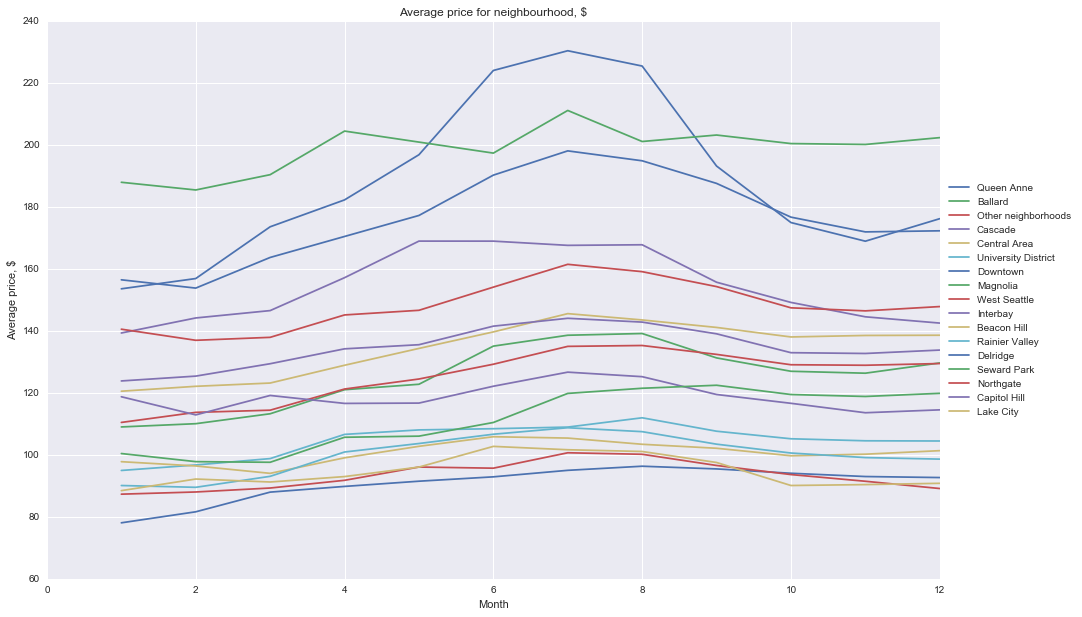

In [180]:

#plot prices for each neighbourhood
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

for neighbourhood in neighbourhoods:
    ax.plot(price_by_month_neighbourhood[price_by_month_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['month'],
             price_by_month_neighbourhood[price_by_month_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['price'],
             label = neighbourhood)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price for neighbourhood, $')
plt.show()

# Text features

# Datetime features

### host_since

In [204]:
# convert host_since date into number and fill in missing values, drop the original column
listings_df['host_since'] = pd.to_datetime(listings_df['host_since'])
listings_df['host_since'] = listings_df['host_since'].apply(lambda x:x.to_pydatetime())
listings_df['host_since_year'] = listings_df['host_since'].apply(lambda x:x.year)
listings_df['host_since_year'].fillna(listings_df['host_since_year'].mean(), inplace = True)
listings_df['host_since_year'] = listings_df['host_since_year'].astype(int)



# Calendar

In [114]:
# convert price to number 
calendar_df['price'] = calendar_df['price'].str.replace("[$, ]", "").astype("float")
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [120]:
# remove NaN rows for a subset of columns
calendar_df = calendar_df.dropna(subset=['price'])

In [122]:
# remove NaN rows for all columns
calendar_df = calendar_df.dropna()

In [127]:
# Histogram for price distribution
mean_price_for_calendar = calendar_df.groupby('listing_id').mean()['price']
mean_price_for_calendar

listing_id
3335        120.000000
4291         82.000000
5682         53.944984
6606         92.849315
7369         85.000000
9419         85.616438
9460        113.736842
9531        169.500000
9534        125.000000
9596        121.404959
10385        60.000000
10695       109.000000
11012       312.849315
11411        60.000000
13068       414.985465
14386        40.000000
15108        60.000000
17951        94.785016
19611       154.827815
19619       198.795620
19623       227.587209
20868       137.000000
20927        91.170088
20928        84.119760
23192       115.529412
23356       222.262997
23430       172.658228
23919       165.000000
24212       262.868056
25002        78.084416
26116       199.230137
30712        75.000000
37234        99.000000
38545       490.053221
41401        91.225519
43373        61.218935
46022        81.336088
47196        67.816092
47491        61.385542
48319       220.000000
48848       125.000000
50233       194.683544
51826        97.000000


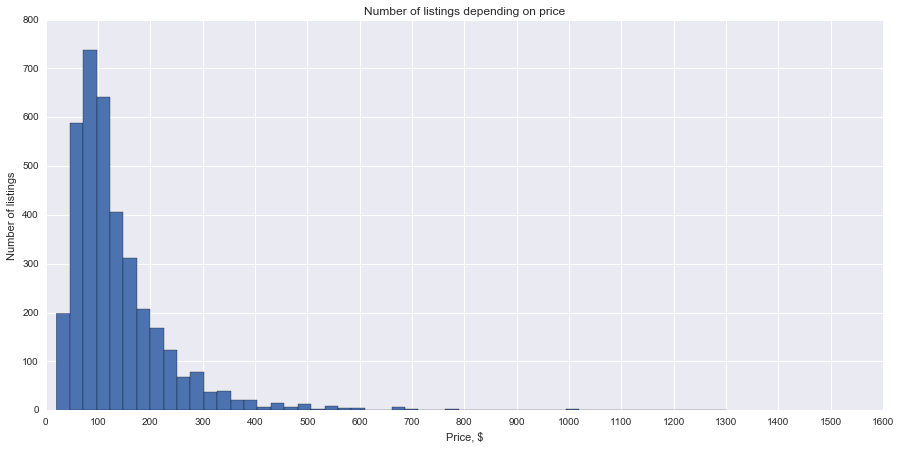

In [128]:
#plot
plt.figure(figsize=(15,7))
plt.hist(mean_price_for_calendar, bins=50)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price, $')
plt.title('Number of listings depending on price')
plt.show()

In [130]:
# extract year, month for each date
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
calendar_df['date'] = calendar_df['date'].apply(lambda x:x.to_pydatetime())
calendar_df['year'] = calendar_df['date'].apply(lambda x:x.year)
calendar_df['year'] = calendar_df['year'].astype(int)
calendar_df['month'] = calendar_df['date'].apply(lambda x:x.month)
calendar_df['month'] = calendar_df['month'].astype(int)

calendar_df.head()

,listing_id,date,available,price,year,month
0,241032,2016-01-04,t,85.0,2016,1
1,241032,2016-01-05,t,85.0,2016,1
9,241032,2016-01-13,t,85.0,2016,1
10,241032,2016-01-14,t,85.0,2016,1
14,241032,2016-01-18,t,85.0,2016,1


In [134]:
number_of_listings_by_month = calendar_df.groupby('month').listing_id.count()
number_of_listings_by_month

month
1     64937
2     73321
3     83938
4     76037
5     79971
6     77244
7     74222
8     76347
9     77246
10    82438
11    81780
12    87061
Name: listing_id, dtype: int64

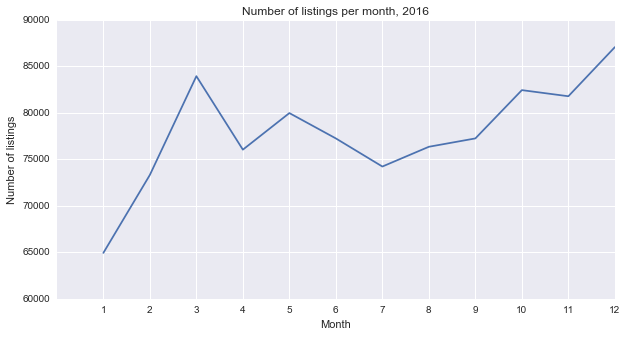

In [144]:
# Line plot
plt.figure(figsize=(10,5))
plt.plot(number_of_listings_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings per month, 2016')
plt.show()

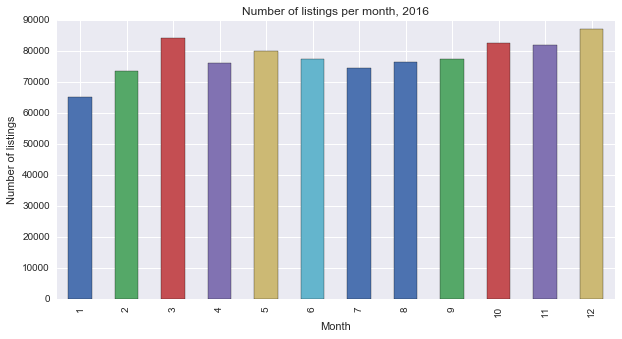

In [143]:
# bar plot
plt.figure(figsize=(10,5))
number_of_listings_by_month.plot(kind='bar', x=number_of_listings_by_month.index.values, y=number_of_listings_by_month.values, legend = False)
plt.ylabel('Number of listings')
plt.xlabel('Month') 
plt.title('Number of listings per month, 2016')
plt.show()

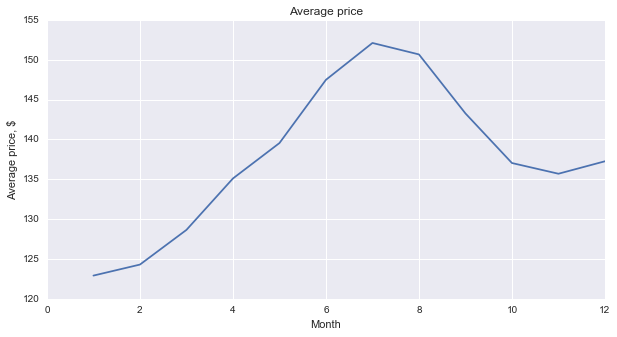

In [146]:
#find average price by month
average_price_by_month = calendar_df.groupby(['month'])['price'].mean()

#plot
plt.figure(figsize=(10,5))
plt.plot(average_price_by_month)
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')
plt.show()

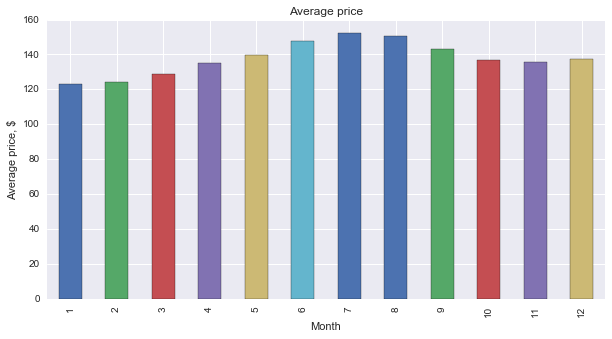

In [147]:
# bar plot
plt.figure(figsize=(10,5))
average_price_by_month.plot(kind='bar', x=average_price_by_month.index.values, y=average_price_by_month.values, legend = False)
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')
plt.show()